#### Pandas Tutorial - Part 37

This notebook covers:
- More on merging and joining DataFrames
- Plotting with pandas
- Data input/output operations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import os

%matplotlib inline

##### Merging and Joining DataFrames

Continuing from Part 36, let's explore more advanced merging and joining operations.

### Appending DataFrames with ignore_index

When appending DataFrames, you might want to ignore the original index values and create a new sequential index.

In [2]:
# Create two sample DataFrames
df1 = pd.DataFrame(np.random.randn(6, 3), columns=['A', 'B', 'C'])
df2 = pd.DataFrame(np.random.randn(4, 3), columns=['A', 'B', 'C'])

# Display the DataFrames
print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)

DataFrame 1:
          A         B         C
0  0.477573 -0.159201 -0.652688
1  1.471486  0.148042  0.484004
2 -2.023603 -0.344210 -0.792670
3  0.440741 -1.776537  0.064627
4  0.150471  0.256826 -0.393907
5  0.648419 -0.329893 -0.012842

DataFrame 2:
          A         B         C
0  1.522446 -1.439185 -0.749458
1 -0.787348 -0.550910 -0.420036
2  0.994233 -0.242063  0.192479
3  0.120642 -1.028988  0.088628


In [5]:
# Append with ignore_index=True
df = pd.concat([df1, df2], ignore_index=True)
df

,A,B,C
0,0.477573,-0.159201,-0.652688
1,1.471486,0.148042,0.484004
2,-2.023603,-0.344210,-0.792670
3,0.440741,-1.776537,0.064627
4,0.150471,0.256826,-0.393907
5,0.648419,-0.329893,-0.012842
6,1.522446,-1.439185,-0.749458
7,-0.787348,-0.550910,-0.420036
8,0.994233,-0.242063,0.192479
9,0.120642,-1.028988,0.088628


### Self Join of a DataFrame

Sometimes you need to join a DataFrame with itself based on certain conditions.

In [6]:
# Create a sample DataFrame
df = pd.DataFrame(data={
    'Area': ['A'] * 5 + ['C'] * 2,
    'Bins': [110] * 2 + [160] * 3 + [40] * 2,
    'Test_0': [0, 1, 0, 1, 2, 0, 1],
    'Data': np.random.randn(7)
})
df

,Area,Bins,Test_0,Data
0,A,110,0,0.659040
1,A,110,1,-0.750379
2,A,160,0,0.653794
3,A,160,1,-0.092549
4,A,160,2,-0.305016
5,C,40,0,-1.025002
6,C,40,1,0.200227


In [7]:
# Add a new column Test_1 which is Test_0 - 1
df['Test_1'] = df['Test_0'] - 1
df

,Area,Bins,Test_0,Data,Test_1
0,A,110,0,0.659040,-1
1,A,110,1,-0.750379,0
2,A,160,0,0.653794,-1
3,A,160,1,-0.092549,0
4,A,160,2,-0.305016,1
5,C,40,0,-1.025002,-1
6,C,40,1,0.200227,0


In [8]:
# Self join: join the DataFrame with itself
# Join where Test_0 in the left DataFrame equals Test_1 in the right DataFrame
pd.merge(df, df, 
         left_on=['Bins', 'Area', 'Test_0'],
         right_on=['Bins', 'Area', 'Test_1'],
         suffixes=('_L', '_R'))

,Area,Bins,Test_0_L,Data_L,Test_1_L,Test_0_R,Data_R,Test_1_R
0,A,110,0,0.659040,-1,1,-0.750379,0
1,A,160,0,0.653794,-1,1,-0.092549,0
2,A,160,1,-0.092549,0,2,-0.305016,1
3,C,40,0,-1.025002,-1,1,0.200227,0


##### Plotting with Pandas

Pandas integrates with Matplotlib to provide plotting capabilities directly from DataFrames and Series.

### Boxplot for Each Quartile of a Stratifying Variable

Let's create a boxplot for each quartile of a stratifying variable.

In [9]:
# Create a sample DataFrame
df = pd.DataFrame({
    'stratifying_var': np.random.uniform(0, 100, 20),
    'price': np.random.normal(100, 5, 20)
})

# Create quartile categories
df['quartiles'] = pd.qcut(
    df['stratifying_var'],
    4,
    labels=['0-25%', '25-50%', '50-75%', '75-100%']
)

df.head()

,stratifying_var,price,quartiles
0,27.833139,98.800747,0-25%
1,72.355418,99.427625,75-100%
2,29.298622,93.828685,25-50%
3,73.673778,97.707332,75-100%
4,32.591467,96.951185,25-50%


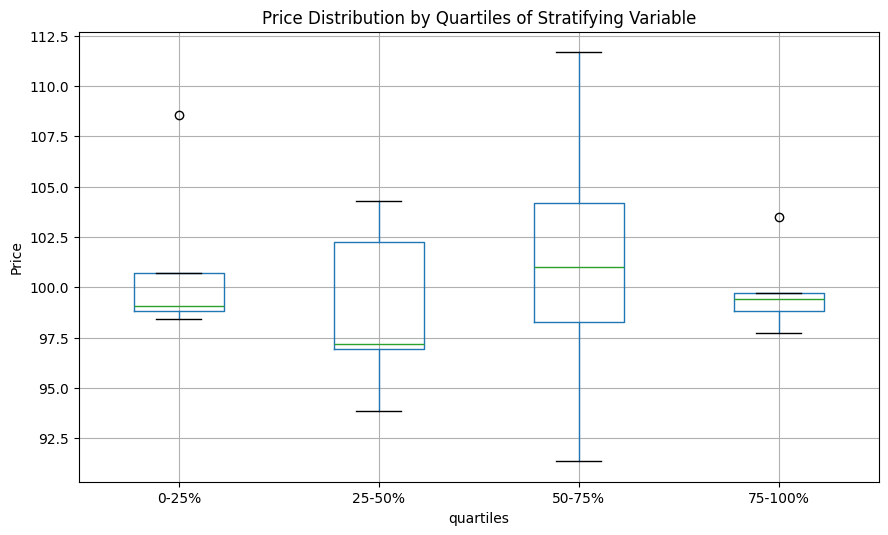

In [10]:
# Create a boxplot for each quartile
df.boxplot(column='price', by='quartiles', figsize=(10, 6))
plt.title('Price Distribution by Quartiles of Stratifying Variable')
plt.suptitle('')  # Remove the default suptitle
plt.ylabel('Price')
plt.show()

### Creating a Multi-line Plot

Let's create a multi-line plot to visualize multiple time series.

In [11]:
# Create a DataFrame with multiple time series
dates = pd.date_range('2020-01-01', periods=100)
df = pd.DataFrame({
    'Series1': np.random.randn(100).cumsum(),
    'Series2': np.random.randn(100).cumsum(),
    'Series3': np.random.randn(100).cumsum()
}, index=dates)

df.head()

,Series1,Series2,Series3
2020-01-01,-1.981351,-0.633187,0.385296
2020-01-02,-2.390988,-1.335706,2.223779
2020-01-03,-3.477841,-0.845883,2.414845
2020-01-04,-4.557949,-1.654762,3.742082
2020-01-05,-3.460474,-2.860064,3.222790


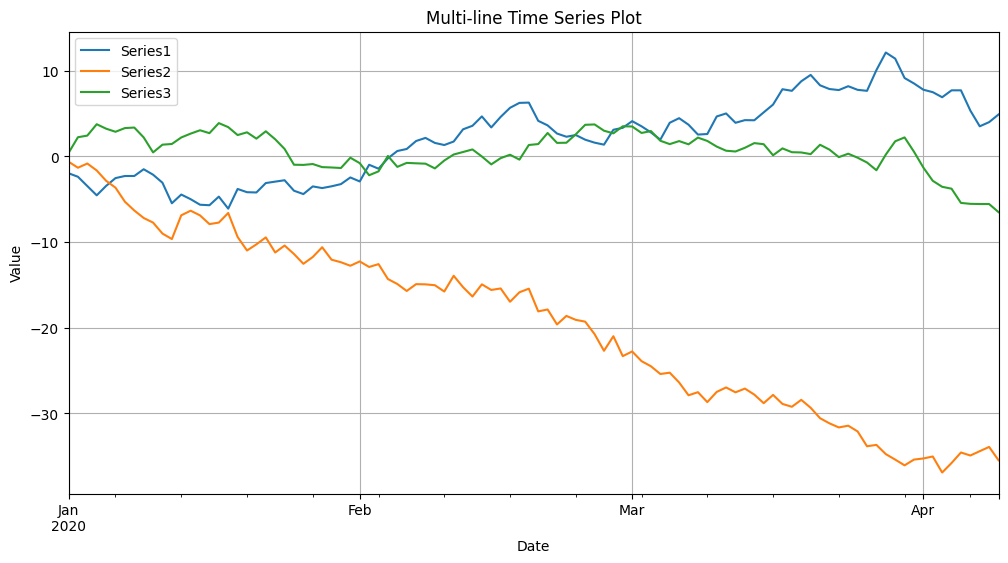

In [12]:
# Plot all series
ax = df.plot(figsize=(12, 6))
ax.set_title('Multi-line Time Series Plot')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
plt.grid(True)
plt.show()

##### Data Input/Output Operations

Pandas provides a wide range of functions for reading from and writing to various file formats.

### Reading and Writing CSV Files

CSV (Comma-Separated Values) is one of the most common file formats for data exchange.

In [13]:
# Create a sample DataFrame
df = pd.DataFrame({
    'A': np.random.randn(5),
    'B': np.random.randn(5),
    'C': np.random.randn(5),
    'D': np.random.randn(5)
})
df

,A,B,C,D
0,-0.601985,0.678353,-0.075234,0.498096
1,0.491908,-1.330505,1.094026,0.239663
2,0.667466,0.555838,-1.422754,1.098387
3,2.086731,-0.383932,1.479282,0.352048
4,-0.640780,-0.413682,0.094548,1.347506


In [14]:
# Write to CSV
csv_path = 'sample_data.csv'
df.to_csv(csv_path, index=False)
print(f"Data written to {csv_path}")

Data written to sample_data.csv


In [15]:
# Read from CSV
df_read = pd.read_csv(csv_path)
df_read

,A,B,C,D
0,-0.601985,0.678353,-0.075234,0.498096
1,0.491908,-1.330505,1.094026,0.239663
2,0.667466,0.555838,-1.422754,1.098387
3,2.086731,-0.383932,1.479282,0.352048
4,-0.640780,-0.413682,0.094548,1.347506


### Reading CSV Chunk by Chunk

For large files, you can read the data in chunks to avoid memory issues.

In [16]:
# Create a larger DataFrame for demonstration
large_df = pd.DataFrame({
    'A': np.random.randn(1000),
    'B': np.random.randn(1000),
    'C': np.random.randn(1000)
})

# Write to CSV
large_csv_path = 'large_sample_data.csv'
large_df.to_csv(large_csv_path, index=False)
print(f"Large data written to {large_csv_path}")

Large data written to large_sample_data.csv


In [17]:
# Read in chunks
chunk_size = 200
chunks = []

# Read and process each chunk
for chunk in pd.read_csv(large_csv_path, chunksize=chunk_size):
    # Process the chunk (here we're just calculating the mean of column A)
    processed = pd.DataFrame({'A_mean': [chunk['A'].mean()]})
    chunks.append(processed)

# Combine the processed chunks
result = pd.concat(chunks)
result

,A_mean
0,0.013139
0,-0.105700
0,0.103459
0,-0.050537
0,-0.001332


### Reading from and Writing to Excel Files

Pandas can read from and write to Excel files.

In [18]:
# Create a sample DataFrame
df_excel = pd.DataFrame({
    'Name': ['John', 'Jane', 'Bob', 'Alice'],
    'Age': [28, 34, 42, 31],
    'Salary': [50000, 60000, 55000, 65000]
})
df_excel

,Name,Age,Salary
0,John,28,50000
1,Jane,34,60000
2,Bob,42,55000
3,Alice,31,65000


In [19]:
# Write to Excel
excel_path = 'sample_data.xlsx'
df_excel.to_excel(excel_path, index=False)
print(f"Data written to {excel_path}")

Data written to sample_data.xlsx


In [20]:
# Read from Excel
df_excel_read = pd.read_excel(excel_path)
df_excel_read

,Name,Age,Salary
0,John,28,50000
1,Jane,34,60000
2,Bob,42,55000
3,Alice,31,65000


### Reading from Clipboard

Pandas can read data directly from the clipboard, which is useful for quickly importing data that you've copied from another application.

In [21]:
# Note: This requires data to be in the clipboard
# Example usage (commented out as it depends on clipboard content):
# df_clipboard = pd.read_clipboard()
# df_clipboard

### Reading Fixed-Width Files

Fixed-width files have columns that are aligned by padding with spaces.

In [22]:
# Create a sample fixed-width file
fixed_width_data = """
  Name  Age Salary
  John   28  50000
  Jane   34  60000
  Bob    42  55000
  Alice  31  65000
"""

# Write to a file
with open('fixed_width.txt', 'w') as f:
    f.write(fixed_width_data)

# Read the fixed-width file
df_fwf = pd.read_fwf('fixed_width.txt')
df_fwf

,Name,Age,Salary
0,John,28,50000
1,Jane,34,60000
2,Bob,42,55000
3,Alice,31,65000


##### Conclusion

In this notebook, we've explored:

1. Advanced merging and joining operations in pandas, including:
   - Appending DataFrames with ignore_index
   - Self-joining a DataFrame

2. Plotting capabilities in pandas, including:
   - Creating boxplots for quartiles of a stratifying variable
   - Creating multi-line time series plots

3. Data input/output operations, including:
   - Reading and writing CSV files
   - Reading CSV files chunk by chunk
   - Reading from and writing to Excel files
   - Reading from clipboard
   - Reading fixed-width files

These operations are fundamental for data manipulation and analysis with pandas, allowing you to efficiently work with data from various sources and formats.